In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import to_rgb
import seaborn as sns
from pandas.plotting import scatter_matrix

# Sondaże

In [2]:
no_pools = pd.read_csv('dane_years/pools_data/no_votes.csv', index_col=0, header=0)

In [3]:
per_pools = pd.read_csv('dane_years/pools_data/percent_votes.csv', index_col=0, header=0)

### Years acctual data

In [4]:
w_2001 = pd.read_csv('wyniki_wyborow/Simple/2001_WS.csv', header=0).iloc[1,-3:]
w_2001 = w_2001.div(w_2001.sum()).fillna(0)

In [5]:
w_2005 = pd.read_csv('wyniki_wyborow/Simple/2005_WS.csv', header=0).iloc[:,-3:].sum(axis=0)
w_2005 = w_2005.div(w_2005.sum()).fillna(0)

In [6]:
w_2007 = pd.read_csv('wyniki_wyborow/Simple/2007_WS.csv', header=0).iloc[:,-3:].sum(axis=0)
w_2007 = w_2007.div(w_2007.sum()).fillna(0)

In [7]:
w_2011 = pd.read_csv('wyniki_wyborow/Simple/2011_WS.csv', header=0).iloc[:,-3:].sum(axis=0)
w_2011 = w_2011.div(w_2011.sum()).fillna(0)

In [8]:
w_2015 = pd.read_csv('wyniki_wyborow/Simple/2015_WS.csv', header=0).iloc[:,-3:].sum(axis=0)
w_2015 = w_2015.div(w_2015.sum()).fillna(0)

In [9]:
w_2019 = pd.read_csv('wyniki_wyborow/Simple/2019_WS.csv', header=0).iloc[:,-3:].sum(axis=0)
w_2019 = w_2019.div(w_2019.sum()).fillna(0)

In [10]:
wyn = pd.concat([w_2001, w_2005, w_2007, w_2011, w_2015, w_2019], axis=1)
wyn.columns = ['2001', '2005', '2007', '2011', '2015', '2019']
wynT = wyn.T.iloc[:,:-1]
wynT.index = wynT.index.astype('int64').rename('index')
wynT

,Blue,Red
index,,
2001,0.619930,0.236167
2005,0.533305,0.354480
2007,0.410174,0.546641
2011,0.298898,0.658004
2015,0.515137,0.392342
2019,0.589442,0.399568


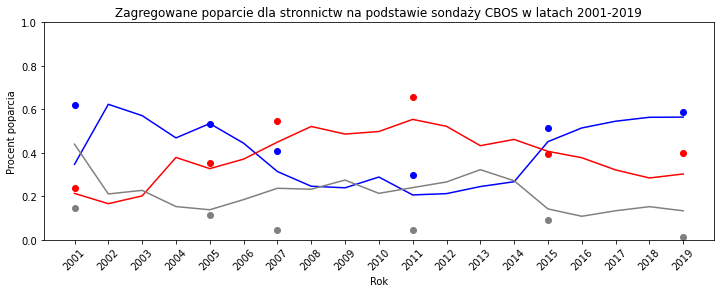

In [16]:
#plot.area()
fig, ax = plt.subplots()

per_pools.plot(color=['b','r','gray'],figsize=(12,4), legend=None, sharex=True, ax=ax)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
ax.scatter(x=np.array([0,4,6,10,14,18])+2001, y= wyn.iloc[0,:], c='b')
ax.scatter(x=np.array([0,4,6,10,14,18])+2001, y= wyn.iloc[1,:], c='r')
ax.scatter(x=np.array([0,4,6,10,14,18])+2001, y= wyn.iloc[2,:], c='gray')

#plt.plot()

plt.xticks(range(2001,2020),rotation=45)
plt.ylim(0,1)
plt.title('Zagregowane poparcie dla stronnictw na podstawie sondaży CBOS w latach 2001-2019')
plt.xlabel('Rok')
plt.ylabel('Procent poparcia')
plt.savefig('dane_pdf/sondaze/compare_pools_real_data_3_clust.pdf', bbox_inches='tight')#, format='eps')

### Calculate for 2 clusters

In [17]:
per_pools_2 = per_pools[['Blue','Red']]
per_pools_2 = per_pools_2.div(per_pools_2.sum(1),0).fillna(0)
per_pools_2.index

Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='index')

In [18]:
wyn2 = wyn.iloc[:-1,:]
wyn2 = wyn2.div(wyn2.sum(0),1).fillna(0)
wyn2T = wyn2.T
wyn2T.index = wyn2T.index.astype('int64').rename('index')
wyn2T['year'] = wyn2T.index.values
wyn2T

,Blue,Red,year
index,,,
2001,0.724136,0.275864,2001
2005,0.600714,0.399286,2005
2007,0.428687,0.571313,2007
2011,0.312360,0.687640,2011
2015,0.567657,0.432343,2015
2019,0.595992,0.404008,2019


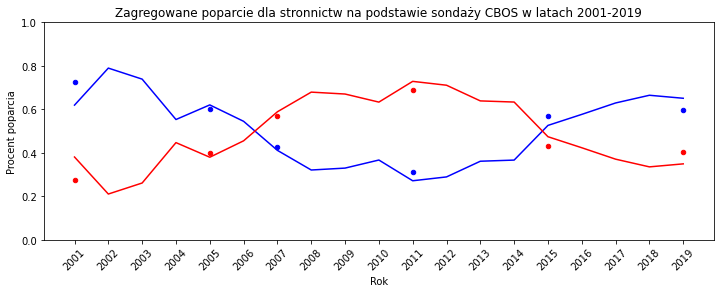

In [20]:
#plot.area()
fig, ax = plt.subplots()

per_pools_2.plot(color=['b','r'],figsize=(12,4), legend=None, sharex=True, ax=ax)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
#ax.scatter(x=np.array([0,4,6,10,14,18])+2001, y= wyn2.iloc[0,:], c='b')
#ax.scatter(x=np.array([0,4,6,10,14,18])+2001, y= wyn2.iloc[1,:], c='r')
wyn2T.plot(x='year', y=['Blue'], color=['b'], kind='scatter', legend=None, sharex=True, ax=ax)
wyn2T.plot(x='year', y=['Red'], color=['r'], kind='scatter', legend=None, sharex=True, ax=ax)

#plt.plot()

plt.xticks(range(2001,2020),rotation=45)
plt.ylim(0,1)
plt.title('Zagregowane poparcie dla stronnictw na podstawie sondaży CBOS w latach 2001-2019')
plt.xlabel('Rok')
plt.ylabel('Procent poparcia')
plt.savefig('dane_pdf/sondaze/compare_pools_real_data_2_clust.pdf', bbox_inches='tight')#, format='eps')

### Obliczanie błedu wzglednego i bezwzglednego

In [21]:
wyn2Tn = wyn2T.iloc[:,:-1]

In [22]:
w2 = wyn2Tn.merge(per_pools_2, how='left', left_index=True, right_index=True,
             suffixes=('_real', '_pool'))

In [23]:
w3 = wynT.merge(per_pools, how='left', left_index=True, right_index=True,
           suffixes=('_real', '_pool'))

In [24]:
w3.columns

Index(['Blue_real', 'Red_real', 'Blue_pool', 'Red_pool', 'Gray'], dtype='object')

In [26]:
errB = pd.DataFrame({
    '3_bezwzg_B': (w3['Blue_real']- w3['Blue_pool']),
    '3_wzg_B':(w3['Blue_real']- w3['Blue_pool'])/w3['Blue_real'],
    '2_bezwzg_B': (w2['Blue_real']- w2['Blue_pool']),
    '2_wzg_B': (w2['Blue_real']- w2['Blue_pool'])/w2['Blue_real']
})
errR = pd.DataFrame({
    '3_bezwzg_R': w3['Red_real']- w3['Red_pool'],
    '3_wzg_R': (w3['Red_real']- w3['Red_pool'])/w3['Red_real'],
    '2_bezwzg_R': w2['Red_real']- w2['Red_pool'],
    '2_wzg_R': (w2['Red_real']- w2['Red_pool'])/w2['Red_real']
})

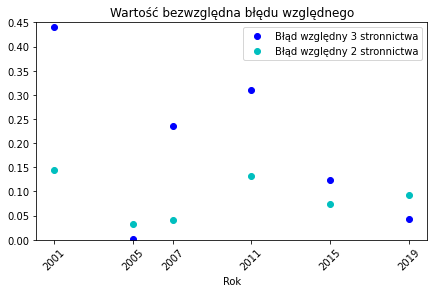

In [34]:
fig, ax = plt.subplots()

errB[['3_wzg_B','2_wzg_B']].abs().plot(#color=['b','c'],
                                 style = ['bo','co'],
                                 figsize=(7,4), sharex=True, ax=ax)
mean_B = errB[['3_wzg_B','2_wzg_B']].abs().mean(0)
#ax.plot([2001,2019],[mean_B[0],mean_B[0]],'b--')
#ax.plot([2001,2019],[mean_B[1],mean_B[1]],'c--')

plt.xticks([2001,2005,2007,2011,2015,2019],rotation=45)
plt.xlabel('Rok')
plt.title('Wartość bezwzględna błędu względnego')
plt.legend(['Błąd względny 3 stronnictwa',
            'Błąd względny 2 stronnictwa' 
            #,'Średni błąd względny 3 stronnictwa' 
            #,'Średni błąd względny 2 stronnictwa'
           ])
plt.ylim(0,0.45)

plt.savefig('dane_pdf/sondaze/errors_B_2_clust.pdf', bbox_inches='tight')#, format='eps')

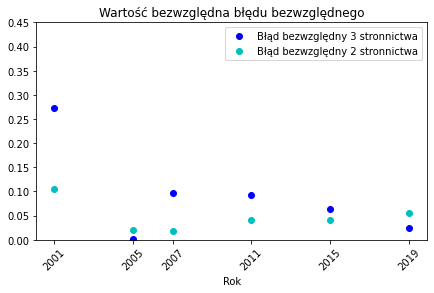

In [33]:
fig, ax = plt.subplots()

errB[['3_bezwzg_B','2_bezwzg_B']].abs().plot(#color=['b','c'],
                                 style = ['bo','co'],
                                 figsize=(7,4), sharex=True, ax=ax)
mean_B = errB[['3_bezwzg_B','2_bezwzg_B']].abs().mean(0)
#ax.plot([2001,2019],[mean_B[0],mean_B[0]],'b--')
#ax.plot([2001,2019],[mean_B[1],mean_B[1]],'c--')

plt.xticks([2001,2005,2007,2011,2015,2019],rotation=45)
plt.xlabel('Rok')
plt.title('Wartość bezwzględna błędu bezwzględnego')
plt.legend(['Błąd bezwzględny 3 stronnictwa',
            'Błąd bezwzględny 2 stronnictwa' 
            #,'Średni błąd bezwzględny 3 stronnictwa' 
            #,'Średni błąd bezwzględny 2 stronnictwa'
           ])
plt.ylim(0,0.45)

plt.savefig('dane_pdf/sondaze/abs_errors_B_2_clust.pdf', bbox_inches='tight')#, format='eps')

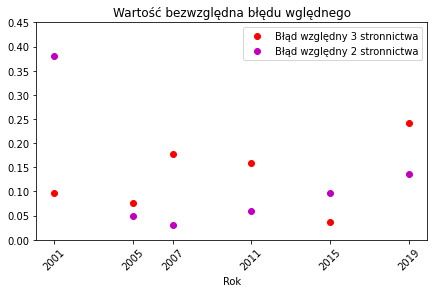

In [35]:
fig, ax = plt.subplots()

errR[['3_wzg_R','2_wzg_R']].abs().plot(#color=['r','m'],
                                 style = ['ro','mo'],
                                 figsize=(7,4), sharex=True, ax=ax)
mean_R = errR[['3_wzg_R','2_wzg_R']].abs().mean(0)
#ax.plot([2001,2019],[mean_R[0],mean_R[0]],'r--')
#ax.plot([2001,2019],[mean_R[1],mean_R[1]],'m--')

plt.xticks([2001,2005,2007,2011,2015,2019],rotation=45)
plt.xlabel('Rok')
plt.title('Wartość bezwzględna błędu wględnego')

plt.legend(['Błąd względny 3 stronnictwa',
            'Błąd względny 2 stronnictwa' 
            #,'Średni błąd względny 3 stronnictwa' 
            #,'Średni błąd względny 2 stronnictwa'
           ])

plt.ylim(0,0.45)

plt.savefig('dane_pdf/sondaze/errors_R_2_clust.pdf', bbox_inches='tight')#, format='eps')

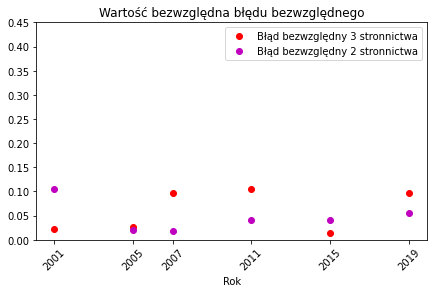

In [47]:
fig, ax = plt.subplots()

errR[['3_bezwzg_R','2_bezwzg_R']].abs().plot(#color=['r','m'],
                                 style = ['ro','mo'],
                                 figsize=(7,4), sharex=True, ax=ax)

mean_R = errR[['3_bezwzg_R','2_bezwzg_R']].abs().mean(0)
#ax.plot([2001,2019],[mean_R[0],mean_R[0]],'r--')
#ax.plot([2001,2019],[mean_R[1],mean_R[1]],'m--')

plt.xticks([2001,2005,2007,2011,2015,2019],rotation=45)
plt.xlabel('Rok')
plt.title('Wartość bezwzględna błędu bezwzględnego')

plt.legend(['Błąd bezwzględny 3 stronnictwa',
            'Błąd bezwzględny 2 stronnictwa'
            #,'Średni błąd bezwzględny 3 stronnictwa' 
            #,'Średni błąd bezwzględny 2 stronnictwa'
           ])

plt.ylim(0,0.45)

plt.savefig('dane_pdf/sondaze/abs_errors_R_2_clust.pdf', bbox_inches='tight')#, format='eps')

<AxesSubplot:xlabel='index'>

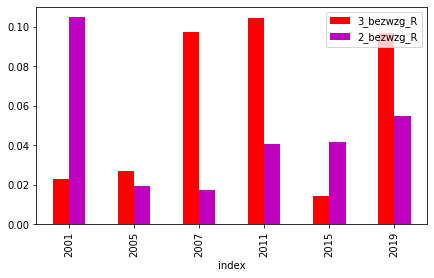

In [37]:
errR[['3_bezwzg_R','2_bezwzg_R']].abs().plot(color=['r','m'],
                                 kind='bar', width=0.5,
                                 figsize=(7,4), sharex=True)

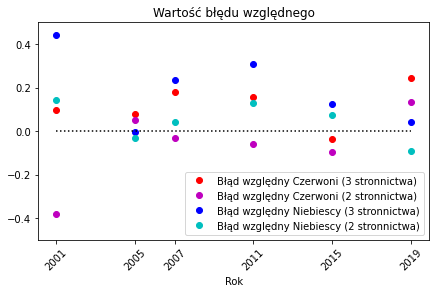

In [41]:
fig, ax = plt.subplots()

errR[['3_wzg_R','2_wzg_R']].plot(#color=['r','m'],
                                 style = ['ro','mo'],
                                 figsize=(7,4), sharex=True, ax=ax)

errB[['3_wzg_B','2_wzg_B']].plot(#color=['b','c'],
                                 style = ['bo','co'],
                                 figsize=(7,4), sharex=True, ax=ax)

plt.plot([2001,2019],[0,0],'k:')
plt.xticks([2001,2005,2007,2011,2015,2019],rotation=45)
plt.xlabel('Rok')
plt.title('Wartość błędu względnego')

plt.legend(['Błąd względny Czerwoni (3 stronnictwa)',
            'Błąd względny Czerwoni (2 stronnictwa)',
            'Błąd względny Niebiescy (3 stronnictwa)',
            'Błąd względny Niebiescy (2 stronnictwa)',])

plt.ylim(-0.5,0.5)

plt.savefig('dane_pdf/sondaze/errors_RB_clust.pdf', bbox_inches='tight')#, format='eps')

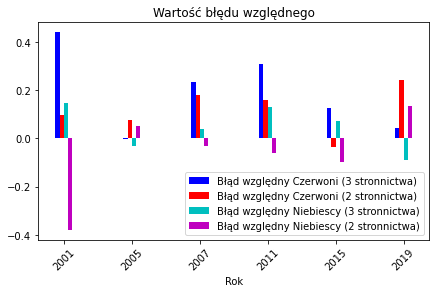

In [46]:
(errR[['3_wzg_R','2_wzg_R']].merge(errB[['3_wzg_B','2_wzg_B']],left_index=True, right_index=True)
 [['3_wzg_B','3_wzg_R','2_wzg_B','2_wzg_R']]
 .plot(color=['b','r','c','m'],
 kind='bar', width=0.25,
 figsize=(7,4)))
plt.xlabel('Rok')
plt.title('Wartość błędu względnego')
plt.legend(['Błąd względny Czerwoni (3 stronnictwa)',
            'Błąd względny Czerwoni (2 stronnictwa)',
            'Błąd względny Niebiescy (3 stronnictwa)',
            'Błąd względny Niebiescy (2 stronnictwa)',])
plt.xticks(rotation=45)
plt.savefig('dane_pdf/sondaze/errors_RB_clust_bars.pdf', bbox_inches='tight')#, format='eps')